# Crear referencias relativas de archivos

Este tema trata de resolver el problema de que los scripts dejen de funcionar debido a la rutas y sus cambios de entorno. Necesitamos definir una forma de donde inicia nuestro proyecto y a partir de ahí donde construir rutas

## Objetivo
Necesitamos encontrar una forma de evitar que nuestro proyecto se rompa cuando movamos de lugar un archivo dentro del proyecto, para esto usaremos Referencias Relativas.

### Estando dentro de VSCode
Vamos a aprender como crear una raíz a nuestro proyecto. Lo que queremos hacer es encontrar una manera de decirle a Python **"Mi proyecto empieza aquí"** y a partir de aquí comienzan las siguientes rutas. Hay diferentes formas de hacerlo.

## Pyprojroot
`import pyprojroot` Importamos la biblioteca, después lo que hacemos es `pyprojroot.here()` y esto nos genera un **PosixPath**.

Para acceder a mi carpeta de datos.     
`pyprojroot.here("data").joinpath('raw')`

Esto me ayuda a tener un control sobre el proyecto y evitar que las rutas se dañen. Solamente si movemos los datos tendremos que actualizar la ruta.

## Pyhere
Realiza una tarea similar a la anterior pero tiene una función `here()` que me indica en donde estoy y también me regresa un **PosixPath**, lo que significa que trabaja con Pathlib. Pero también significa que contiene una ruta **padre**, es decir un paso atras, desde donde le indiques.

```py
#importando
import pyhere
#Llamando a la función 
pyhere.here() #me dice donde estoy
# Utilizando resolve
pyhere.here().resolve() #me dice donde estoy y me regresa un PosixPath
# Accediendo a una ruta
pyhere.here().resolve()/"data"/"raw"
```

Con estas 2 librerías tu puedes crear tus rutas para tus proyectos y mejorar tu flujo de trabajo.

## Creando Shorcuts

Es muy común que tengas que realizar ciertas a tareas de manera repetida, entre ellas podrían ser:
- Acceder a la carpeta de datos.
- Acceder a la carpeta de datos preprocesados.

Entre ellas podríamos encontrarnos lo siguiente:     
``pyprojroot.here().joinpath("data","raw")`` invocar mucho este comando, lo que podríamos hacer es realizar una función.

Queremos hacer una función que nos permita acceder de una manera rápida a cualquier directorio. Dentro de la función queremos obtener una función que sea similar a `here()` pero con rutas personalizables.

```py
def make_dir_function(dir_name):

    def dir_function(*args):
        #La función recibe o no tiene limite de argumentos
        return pyprojroot.here().joinpath(dir_name,*args)
    return dir_function
```
**NOTA:** Con la función no importa la cantidad de argumentos `*args`

Procedemos a ejecutar la función y nos regresa lo siguiente, con **n** número de elementos

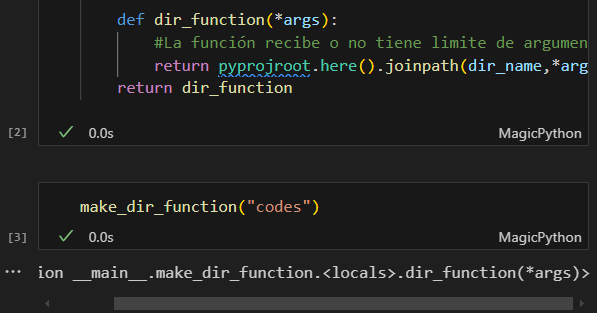

Haciendo uso de la función. 

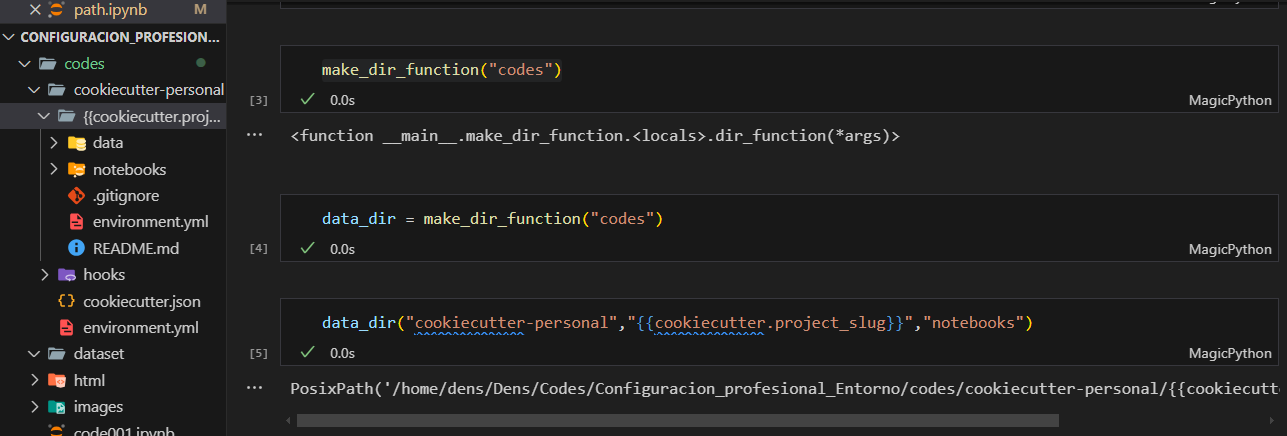

También puedo hacer uso de los métodos que tenían las demás librerías 

```py
#Usando la función
data_dir("cookiecutter-personal","{{cookiecutter.project_slug}}","notebooks")
# Peguntando si existe 
data_dir("cookiecutter-personal","{{cookiecutter.project_slug}}","notebooks").exists()
```
Así de esta forma hemos creado una función que me permitirá crear shortcuts para acceder a los directorios.

Si quisiéramos hacer un shortcut para la carpeta **notebooks**, haríamos lo siguiente y quedaría indicado que la variable o función `noteboooks_dir` es también una raíz.

```py
#Usando la función
notebooks_dir = data_dir("notebooks")
```

Ademas es más explicito el uso de estas funciones para los directorios, pues podemos nombrarlas como tienen el nombre los directorios.